### Usama Ahmed Kawashty Abdelrheem | 18Q9584
### Yousef Mohamed Elsharkawy | 18Q4486

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, cross_validate

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score,  f1_score

Exploring the Data, removing uneeded columns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# dropping the index column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


# KNN

In [5]:
# Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# Splitting the data
columns = df.columns
X = df[columns[:-1]]
y = df[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)
# comment the next line if using GridsearchCV or cross_val_predict
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2)


In [7]:
# array of different k values
k_range = np.arange(1,20)

In [8]:
# corss_val_predict
# Training set contains the validation se (cross validation)
# measuring the accuracy and the recall score for different valeus of k
accs_cv = []
recalls_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = cross_val_predict(knn, X_train, y_train, cv = 10)
    accs_cv.append(accuracy_score(y_train, y_pred))
    recalls_cv.append(recall_score(y_train, y_pred))

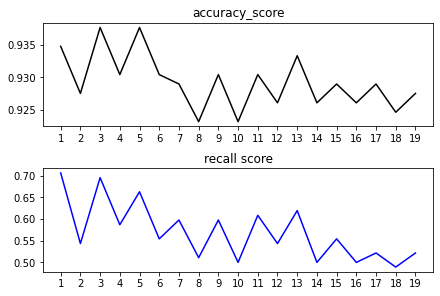

In [9]:
# plotting them to get the get the best value
fig, axes = plt.subplots(2, constrained_layout=True)
plt.setp(axes, xticks = k_range)

axes[0].plot(k_range, accs_cv, c="k")
axes[0].set_title("accuracy_score")

axes[1].plot(k_range, recalls_cv, c="b")
axes[1].set_title("recall score");


In [10]:
# from the previosu plots, it seems 3 is the optimal number for the number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

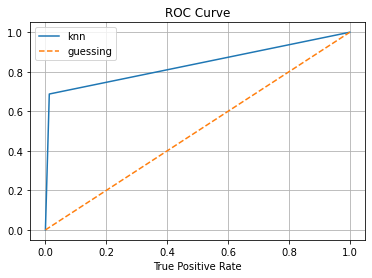

In [11]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "knn");
plt.plot(np.array([0, 1]), np.array([0, 1]), "--", label = "guessing")
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.grid()

In [12]:
# Measuring the model with different classsification metrics
print(confusion_matrix(y_test, y_pred))
print(f"precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"f_1: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred) * 100:.2f}%")

[[155   2]
 [  5  11]]
precision: 84.62%
recall: 68.75%
f_1: 75.86%
roc_auc_score: 83.74%


- We're more concerned with the `recall`, to prevent any fatal case from misclassification as normal or recoverable case

- because the recall is `0.6875`, which is not very different from the prue guessing `0.5` ➡️ we need to improve our moddel

- Since the KNN is sensitive to noise, we will try to clean our data set

Data Plotting and cleaning

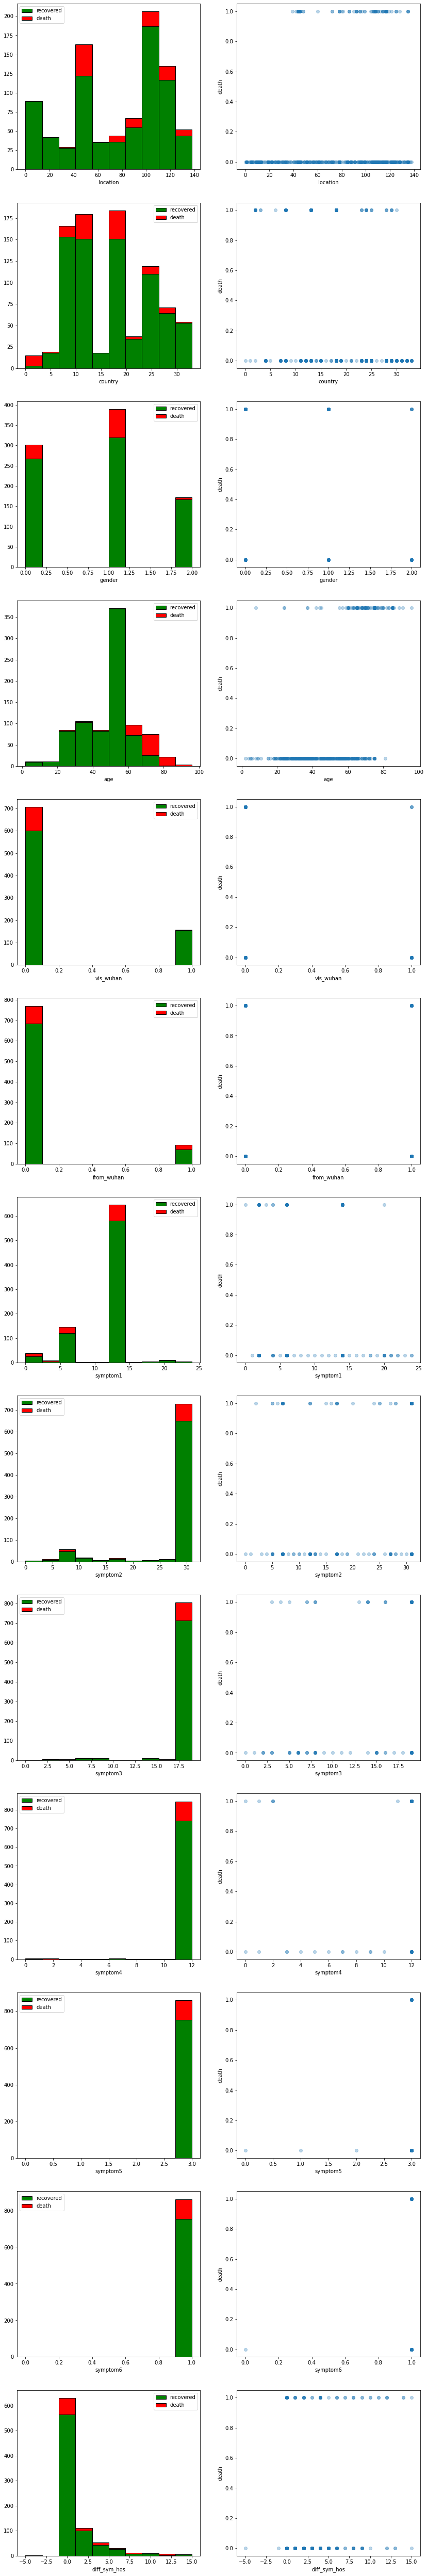

In [13]:
fig, axes = plt.subplots(nrows= 13, ncols=2, figsize = (14,91))
for i in range(len(df.columns) - 1):
    axes[i, 0].hist([df.query("result == 0")[df.columns[i]], df.query("result == 1")[df.columns[i]]], edgecolor ="k", histtype="barstacked", label=("recovered", "death"), color = ('g', 'r'))
    axes[i, 1].scatter(df[df.columns[i]], df["result"], alpha = 0.3);
    axes[i, 0].legend()
    axes[i, 0].set_xlabel(f"{df.columns[i]}");
    axes[i, 1].set_xlabel(f"{df.columns[i]}");
    axes[i, 1].set_ylabel(f"death");
    axes[i, 1].set_ylabel(f"death");
    

From the previous plots, we can remove some rows to improve the data quality

In [14]:
# age
indices = df.query("result == 0 & age > 74").index
print(len(indices))
df_knn = df.drop(indices)

9


In [15]:
# symptom1
indices = df_knn.query("result == 1 & symptom1 > 15").index
print(len(indices))
df_knn.drop(indices, inplace= True)

1


Repeat the previous steps

In [16]:
# Splitting the data
columns = df_knn.columns
X = df_knn[columns[:-1]]
y = df_knn[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
# comment the next line if using GridsearchCV or cross_val_predict
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2)


In [17]:
# corss_val_predict
# Training set contains the validation se (cross validation)
# measuring the accuracy and the recall score for different valeus of k
accs_cv = []
recalls_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = cross_val_predict(knn, X_train, y_train, cv = 10)
    accs_cv.append(accuracy_score(y_train, y_pred))
    recalls_cv.append(recall_score(y_train, y_pred))

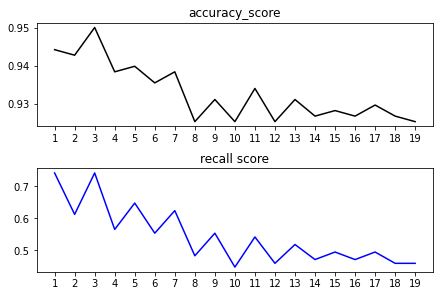

In [18]:
# plotting them to get the get the best value
fig, axes = plt.subplots(2, constrained_layout=True)
plt.setp(axes, xticks = k_range)

axes[0].plot(k_range, accs_cv, c="k")
axes[0].set_title("accuracy_score")

axes[1].plot(k_range, recalls_cv, c="b")
axes[1].set_title("recall score");


In [19]:
# from the previosu plots, it seems 3 is the optimal number for the number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
y_pred = knn.predict(X_test)

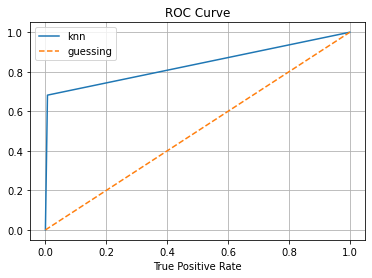

In [20]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "knn");
plt.plot(np.array([0, 1]), np.array([0, 1]), "--", label = "guessing")
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.grid()

In [21]:
# Measuring the model with different classsification metrics
print(confusion_matrix(y_test, y_pred))
print(f"precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"f_1: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred) * 100:.2f}%")

[[148   1]
 [  7  15]]
precision: 93.75%
recall: 68.18%
f_1: 78.95%
roc_auc_score: 83.76%


Comment: the recall is 82%, which is good

# Logistic Regression

In [22]:
# Importing the Library
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
# Resetting the test and the training sets
columns = df.columns
X = df[columns[:-1]]
y = df[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
# comment the next line if using GridsearchCV or cross_val_predict
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=1)


- we will use GridSearchCV to tune the hyper parameters
- we used the scoring method *i.e., goal* of the gridsearch to be `recall` since this is a medical application and we are very keen on spotting the +ve class (have covid)

In [24]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=grid, n_jobs=-1, cv=10, scoring='recall',error_score=0)
grid_search.fit(X_train,y_train)
print("best parameters for the model are: ")
print(grid_search.best_params_)

best parameters for the model are: 
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


- train the model with the best parameters chosen by gridsearch
- we give weight to the `+ve` classe to emphasize on it's importance since this is a medical application

In [25]:
# Create a logistic regression model and train it 
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.1,solver='newton-cg',max_iter=1000,class_weight='balanced'))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

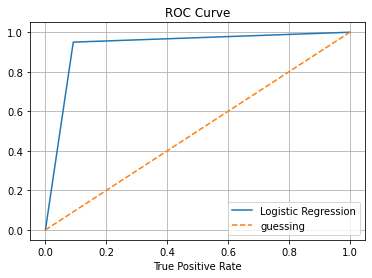

In [26]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "Logistic Regression");
plt.plot(np.array([0, 1]), np.array([0, 1]), "--", label = "guessing")
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.grid()

In [27]:
# Measuring the model with different classsification metrics
print(confusion_matrix(y_test, y_pred))
print(f"precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"f_1: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred) * 100:.2f}%")

[[139  14]
 [  1  19]]
precision: 57.58%
recall: 95.00%
f_1: 71.70%
roc_auc_score: 92.92%


# Naive Bayes

In [28]:
# Importing the Library
from sklearn.naive_bayes import CategoricalNB

I chosed to use `CategoricalNB` according to [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) : 
> The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed.

In [29]:
# Splitting the data again with the default dataset
columns = df.columns
X = df[columns[:-1]]
y = df[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)
# comment the next line if using GridsearchCV or cross_val_predict
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2)


In [30]:
# This will return an error, because there're negative values
NB = CategoricalNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

ValueError: Negative values in data passed to CategoricalNB (input X)

after checking the plots above, the `diff_sym_hos` has negative values

In [31]:
# removing the negative values
indices = df.query("diff_sym_hos < 0").index
print(len(indices))
df_nb = df.drop(indices)

2


In [32]:
# Splitting the data again with the default dataset
columns = df_nb.columns
X = df_nb[columns[:-1]]
y = df_nb[columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)
# comment the next line if using GridsearchCV or cross_val_predict
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2)


In [33]:
NB = CategoricalNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

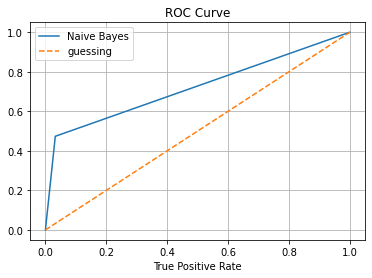

In [34]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "Naive Bayes");
plt.plot(np.array([0, 1]), np.array([0, 1]), "--", label = "guessing")
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.grid()

In [35]:
# Measuring the model with different classsification metrics
print(confusion_matrix(y_test, y_pred))
print(f"precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"f_1: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred) * 100:.2f}%")

[[149   5]
 [ 10   9]]
precision: 64.29%
recall: 47.37%
f_1: 54.55%
roc_auc_score: 72.06%


Comment: The recall value is low, we need to improve it
- we will improve it by chaning the class priorities a little bit,

In [36]:
p0 = df_nb["result"].value_counts()[0] / df_nb["result"].value_counts().sum()
p1 = df_nb["result"].value_counts()[1] / df_nb["result"].value_counts().sum()

Setting different values to test priority changing

In [37]:
pr_changes = np.arange(0.01, 0.5, 0.01)
precisions = []
recalls = []

In [38]:
for i in pr_changes:
    NB = CategoricalNB(class_prior = [p0 - i, p1 + i])
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

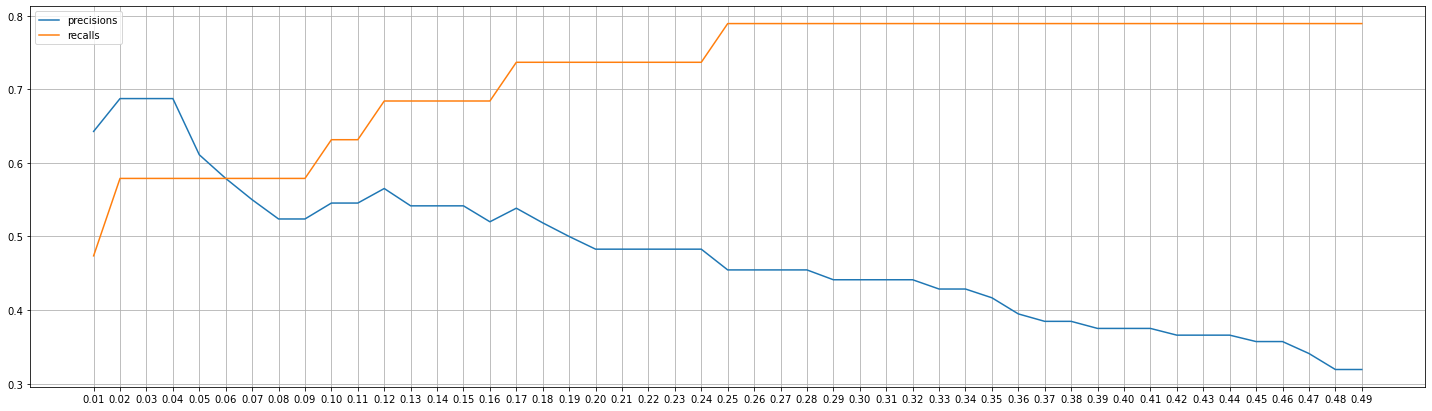

In [39]:
plt.figure(figsize=(25,7))
plt.plot(pr_changes,precisions, label = "precisions")
plt.plot(pr_changes, recalls, label = "recalls")
plt.xticks(pr_changes)
plt.grid()
plt.legend();

`0.17` is good, good recall and acceptable (even low) precision

In [40]:
NB = CategoricalNB(class_prior = [p0 - 0.17, p1 + 0.17])
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

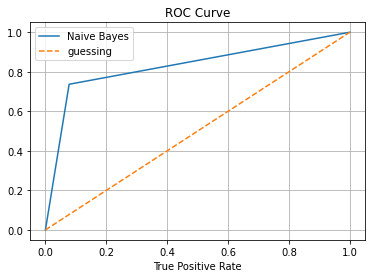

In [41]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "Naive Bayes");
plt.plot(np.array([0, 1]), np.array([0, 1]), "--", label = "guessing")
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.grid()

In [42]:
# Measuring the model with different classsification metrics
print(confusion_matrix(y_test, y_pred))
print(f"precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"f_1: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred) * 100:.2f}%")

[[142  12]
 [  5  14]]
precision: 53.85%
recall: 73.68%
f_1: 62.22%
roc_auc_score: 82.95%
